SIMULATIONS TO SAVE THE DISTRIBUTION OF COOPERATORS AND DEFECTORS IN THE NETWORK

# Import Dependencies

In [ ]:
# Import Dependencies
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(246)  
import time
import datetime
import collections

plt.style.use('default')#'ggplot')

print('Imports sucessful')

Imports sucessful


## Give access to drive
To allow the results to be printed in the output file

In [ ]:
# Allow access to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath="/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Output_BA_b110.txt" 
folder_output="/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/graphs/" 
images_dir = "/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/imagens/"

# Parameters

In [ ]:
# Define the parameters and variables

num_simulations=10#100   # NEVER CHANGE THIS VALUE IT IS USED TO DEFINE THE SEED OF THE NETWORK
N=10**3
number_edges=2

number_of_generations=10**4     # Analyze the evolution in stationary stage
supervised_generations =10**3

# Prisioners Dilema Payoffs
T=1.7 # 1<T<2                                           UPDATE HERE
R=1
P=0
S=0

# Functions

In [ ]:
# Prisioner Dilema
def pd_game(my_opinion, opponent_opinion):
  if my_opinion== 'C':
    if opponent_opinion =='C':
      return R
    else:
      return S
  else:
    if opponent_opinion =='C':
      return T
    else:
      return P

In [ ]:
def print2file(topology,sim_ref,seed,time_spent,fraction_of_cooperators):
  # OPEN FILE
  file1 = open(filepath,"a") 

  # WRITE stuff
  print(f'{datetime.datetime.now()},',
        f'{topology}, ',
        f'{sim_ref:4d}, ',
        f'{seed:2d}, ',
        f'{time_spent:0.6f}, ',
        f'{N}, ',
        f'{number_of_generations}, ',
        f'{supervised_generations}, ',
        f'{R}, ',
        f'{T}, ',
        f'{P}, ',
        f'{S}, ',
        f'{fraction_of_cooperators:0.4f}',
        file=file1)

  #CLOSE FILE
  file1.close()  

In [ ]:
def print_filename2file(filepath,filename):
  # OPEN FILE
  file1 = open(filepath,"a") 

  # WRITE stuff
  print(f'{datetime.datetime.now()},'+
        f'{filename}',
        file=file1)

  #CLOSE FILE
  file1.close()  

In [ ]:
def count_cooperators(G) -> [int,int]:
    # Define a array to count the cooperators and defectors
    # each position of the array corresponds to the degree of the node

    G_deg = nx.degree_histogram(G)
    G_maxdeg = max([b for a, b in zip(G_deg, range(0, len(G_deg)))])

    count_coop=np.zeros(G_maxdeg+1, dtype=int)
    count_defc=np.zeros(G_maxdeg+1, dtype=int)

    for node in G.nodes():
        degree=G.degree[node]
        if G.nodes(data=True)[node]['state']=='C':
            count_coop[degree] +=1
        else:
            count_defc[degree] +=1

    return count_coop, count_defc

In [ ]:
def plot_strategy_per_degree(C_beg,D_beg,C_end,D_end,plot_filepath):
    labels = np.arange(len(C_beg),dtype=int)
    width = 0.8      # the width of the bars: can also be len(x) sequence

    a_top=np.zeros(len(C_beg))
    b_top=np.zeros(len(C_beg))
    a_bot=np.zeros(len(C_beg))
    b_bot=np.zeros(len(C_beg))
    
    for i in range(len(C_beg)):
        if C_beg[i]+D_beg[i]==0:
            a_top[i]=0;b_top[i]=0;
        else:
            b_top[i]=C_beg[i]/(C_beg[i]+D_beg[i])
            a_top[i]=D_beg[i]/(C_beg[i]+D_beg[i])   

        if C_end[i]+D_end[i]==0:
            a_bot[i]=0;b_bot[i]=0;
        else:
            b_bot[i]=C_end[i]/(C_end[i]+D_end[i])
            a_bot[i]=D_end[i]/(C_end[i]+D_end[i])              
    
    fig, ax = plt.subplots(2,1)

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='square', facecolor='white', alpha=0.05)


    ax[0].bar(labels, a_top, width, label='D',color='r', hatch= '/',)
    ax[0].bar(labels, b_top, width,bottom=a_top,label='C',color='g')
    #ax[0].legend()
    ax[0].set_xlim(0, np.max(labels)+2)
    ax[0].set_ylim(0, 1.1) 
    ax[0].text(1.02, 0.95, 'Start', transform=ax[0].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

    
    ax[1].bar(labels, a_bot, width, label='D', color='r', hatch= '/')
    ax[1].bar(labels, b_bot, width,bottom=a_bot, label='C',color='g')
    #ax[1].legend(loc='lower left')
    ax[1].set_xlim(0, np.max(labels)+2)   
    ax[1].set_ylim(0, 1.1)  
    #ax[1].set_yticklabels([0,0.2,0.4,0.6,0.8,1],) 
    ax[1].text(1.02, 0.95, 'End', transform=ax[1].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
    ax[1].set_xlabel('Degree')   
    #fig.set_ylabel('Number of nodes')
    fig.suptitle('Strategy distribution per degree',ha='right')
    fig.legend(labels=['Defectors','Cooperators'],loc='upper right', ncol=2)

    
    plt.show()

    fig.savefig(plot_filepath,format='svg')

# SIMULATION



*   FOR cicle over simultations - number defined at the begining
   1.   CREATES THE BA GRAPH - to be updated   
   2.   FOR over the transient generations
   3.   FOR over the supervised generations saving qt. of cooperators
   4.   Prints the result in the output file.


Simulation    0.RAND.  Time spent: 422.9772 seconds   Fraction of coop.= 0.9896779999999998
Simulation    0. MOD.  Time spent: 427.8629 seconds   Fraction of coop.= 0.991298
Simulation    1.RAND.  Time spent: 425.1347 seconds   Fraction of coop.= 0.9932989999999999
Simulation    1. MOD.  Time spent: 420.8360 seconds   Fraction of coop.= 0.991745
Simulation    2.RAND.  Time spent: 426.4643 seconds   Fraction of coop.= 0.9930760000000001
Simulation    2. MOD.  Time spent: 421.5718 seconds   Fraction of coop.= 0.984589
Simulation    3.RAND.  Time spent: 420.4160 seconds   Fraction of coop.= 0.978831
Simulation    3. MOD.  Time spent: 417.7156 seconds   Fraction of coop.= 1.0
Simulation    4.RAND.  Time spent: 423.7292 seconds   Fraction of coop.= 0.9813219999999999
Simulation    4. MOD.  Time spent: 421.8847 seconds   Fraction of coop.= 0.993851
Simulation    5.RAND.  Time spent: 423.2300 seconds   Fraction of coop.= 0.984654
Simulation    5. MOD.  Time spent: 418.2469 seconds   Fraction 

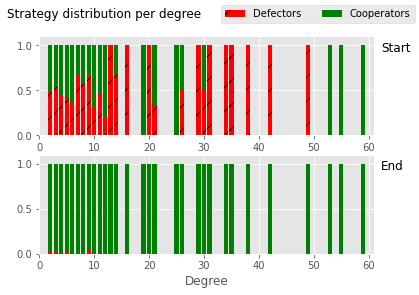

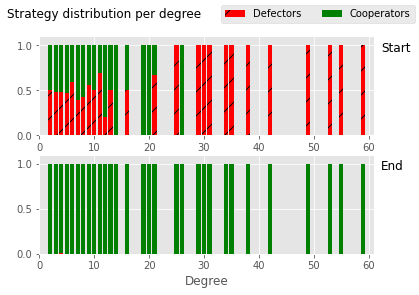

Time spent: 8443.6594 seconds
TASK FINISHED. RESULTS OUTPUT IN FILE:
 /content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Output_BA_b110.txt


In [ ]:
tic_master=time.perf_counter()

# The total number of simulations is divided into 5 different newtorks
# for each topology. This is done controlling the seed
seed=21#+sim//(num_simulations//5) # This is the integer division 
# ______________________________________________________________________________
# Create the Network                          ------ CHOOSE ONE -----
G = nx.barabasi_albert_graph(N, number_edges, seed = seed); name='BA_RAND'
#G = nx.watts_strogatz_graph(N, k = 4, p = 1, seed = seed); name='NWS_1-model'
#G = nx.watts_strogatz_graph(N, k = 4, p = 0, seed = seed); name='NWS-model'
#G = nx.random_regular_graph(n = N, d = 4, seed = seed); name='Regular-model'
# ______________________________________________________________________________
# Create a copy of the network to analyse different distribution of defectors
Gmod=G; name2='BA__MOD'

G_deg = nx.degree_histogram(G)
G_maxdeg = max([b for a, b in zip(G_deg, range(0, len(G_deg)))])

t_values=np.array([1.8])#[1.5, 1.6, 1.7, 1.8, 1.9, 1.99])

evolution_cooperators=[];np.zeros((1,number_of_generations+supervised_generations))
legend_str=[]

for element in t_values:
  T=element
  C_BA_RAND_beg=np.zeros((num_simulations,G_maxdeg+1)); D_BA_RAND_beg=np.zeros((num_simulations,G_maxdeg+1))
  C_BA_RAND_end=np.zeros((num_simulations,G_maxdeg+1)); D_BA_RAND_end=np.zeros((num_simulations,G_maxdeg+1))
  C_BA__MOD_beg=np.zeros((num_simulations,G_maxdeg+1)); D_BA__MOD_beg=np.zeros((num_simulations,G_maxdeg+1))
  C_BA__MOD_end=np.zeros((num_simulations,G_maxdeg+1)); D_BA__MOD_end=np.zeros((num_simulations,G_maxdeg+1))




  # Iterate over a couple simulations
  for sim in range(num_simulations):
    
  # ______________________________________________________________________________
  #                         RUN FIRST PART WITH RANDOM DISTRIBUTION
  # ______________________________________________________________________________
    # Set the timer for control
    tic = time.perf_counter()

    # Distribution strategy
    # Distribute 50% cooperators and 50% Defectors in the network
    states = np.random.choice(['C','D'], size=len(G.nodes()))
    nx.set_node_attributes(G, dict(zip(G.nodes(), states)), 'state')


    C_BA_RAND_beg[sim], D_BA_RAND_beg[sim] = count_cooperators(G)
    # WRITE THE INITIAL DISTRIBUTION ______________________________________________________________________________ First time I Save G
  #  str1=folder_output+'G_'+name+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'_beg.txt'
  #  nx.write_gml(G, str1)  #nx.read_gml(filepath)
  #  print_filename2file(folder_output+'listed_files.txt',str1)
    # _____________________________________________________________________________________________________________ First time I Save G
    # Initialize the num_cooperators counter

    num_cooperators_1=np.zeros(number_of_generations)
    # Iterate over the generations:
    for g in range(number_of_generations):
      # Play the PD to evaluate the fitness
      cum_payoff=np.zeros(len(G.nodes()))
      for u,v,c in G.edges(data=True):   # u is the first node; v is the second node
        cum_payoff[u] += pd_game(G.nodes(data=True)[u]['state'],G.nodes(data=True)[v]['state'])
        cum_payoff[v] += pd_game(G.nodes(data=True)[v]['state'],G.nodes(data=True)[u]['state'])
      
      # Replicate the strategy
      for node in G.nodes():
        neigs=list(G[node])
        neig_selected=random.choice(neigs)
      
        payoff_diff=cum_payoff[neig_selected]-cum_payoff[node]

        # Verify the condition for updating the value
        if payoff_diff>0:
          # Estimate the probability p
          k_higher=np.max([len(neigs),len(list(G[neig_selected]))])
          prob=payoff_diff/(k_higher*(T-S))
        
          # Update the strategy with probability p
          if random.random() < prob:
            G.nodes[node]['state']=G.nodes[neig_selected]['state']
          #else: do nothing

      # Store the number of cooperators
      for node in G.nodes():
        if G.nodes(data=True)[node]['state']=='C':
          num_cooperators_1[g] +=1

    # Initialize the num_cooperators counter
    num_cooperators=np.zeros(supervised_generations)
    # Iterate over the SUPERVISED generations:
    for g in range(supervised_generations):
      # Play the PD to evaluate the fitness
      cum_payoff=np.zeros(len(G.nodes()))
      for u,v,c in G.edges(data=True):   # u is the first node; v is the second node
        cum_payoff[u] += pd_game(G.nodes(data=True)[u]['state'],G.nodes(data=True)[v]['state'])
        cum_payoff[v] += pd_game(G.nodes(data=True)[v]['state'],G.nodes(data=True)[u]['state'])

      # Replicate the strategy
      for node in G.nodes():
        neigs=list(G[node])
        neig_selected=random.choice(neigs)
      
        payoff_diff=cum_payoff[neig_selected]-cum_payoff[node]

        # Verify the condition for updating the value
        if payoff_diff>0:
          # Estimate the probability p
          k_higher=np.max([len(neigs),len(list(G[neig_selected]))])
          prob=payoff_diff/(k_higher*(T-S))
        
          # Update the strategy with probability p
          if random.random() < prob:
            G.nodes[node]['state']=G.nodes[neig_selected]['state']
        #else: do nothing

      # Store the number of cooperators
      for node in G.nodes():
        if G.nodes(data=True)[node]['state']=='C':
          num_cooperators[g] +=1

    # Evaluate the time of this simulation
    toc = time.perf_counter()
    # Print the results in the output file
    #print2file(name,sim,seed,toc-tic,np.mean(num_cooperators/len(G.nodes())))
    evolution_cooperators=np.append(evolution_cooperators,np.concatenate((num_cooperators_1,num_cooperators),axis=None)/len(G.nodes()),axis=0)
    # Print info regarding the execution time and sim_number
    print(f"Simulation {sim:4d}.RAND.  Time spent: {toc - tic:0.4f} seconds   Fraction of coop.=",np.mean(num_cooperators/len(Gmod.nodes())))



    C_BA_RAND_end[sim], D_BA_RAND_end[sim] = count_cooperators(G)
    # MAKE THE PLOT ____________________________________________________________________________________________ PLOTTING
  #  pic_filepath=images_dir+'degree_G_'+name+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'.svg'
  #  plot_strategy_per_degree(C_BA_RAND_beg, D_BA_RAND_beg,
  #                           C_BA_RAND_end, D_BA_RAND_end,
  #                           pic_filepath)
    # WRITE THE FINAL DISTRIBUTION ______________________________________________________________________________ Second time I Save G
  #  str1=folder_output+'G_'+name+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'_end.txt'
  #  nx.write_gml(finalG, str1)  #nx.read_gml(filepath)
  #  print_filename2file(folder_output+'listed_files.txt',str1)
    # ___________________________________________________________________________________________________________ Second time I Save G

  # ______________________________________________________________________________
  #                         RUN SECOND PART WITH DEFINED DISTRIBUTION   (MOD)
  # ______________________________________________________________________________
    # Set the timer for control
    tic = time.perf_counter()

    # Distribution strategy
    # Distribute 50% cooperators and 50% Defectors in the network
    states = np.random.choice(['C','D'], size=len(G.nodes()))
    nx.set_node_attributes(G, dict(zip(G.nodes(), states)), 'state')

    #Sort according to degree
    sorted_degrees = sorted(Gmod.degree, key=lambda x: x[1], reverse=True)

    #Make the first 50% detractors and the last 50% cooperators

    for i in range(len(sorted_degrees)//100):
      Gmod.nodes[sorted_degrees[i][0]]['state'] = 'D'

    C_BA__MOD_beg[sim], D_BA__MOD_beg[sim]= count_cooperators(Gmod)

    # WRITE THE INITIAL DISTRIBUTION ______________________________________________________________________________ First time I Save Gmod
  #  str1=folder_output+'G_'+name2+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'_beg.txt'
  #  nx.write_gml(Gmod, str1)  #nx.read_gml(filepath)
  #  print_filename2file(folder_output+'listed_files.txt',str1)
  # ______________________________________________________________________________________________________________ First time I Save Gmod

    num_cooperators_1=np.zeros(number_of_generations)

    # Iterate over the generations:
    for g in range(number_of_generations):
      # Play the PD to evaluate the fitness
      cum_payoff=np.zeros(len(Gmod.nodes()))
      for u,v,c in Gmod.edges(data=True):   # u is the first node; v is the second node
        cum_payoff[u] += pd_game(Gmod.nodes(data=True)[u]['state'],Gmod.nodes(data=True)[v]['state'])
        cum_payoff[v] += pd_game(Gmod.nodes(data=True)[v]['state'],Gmod.nodes(data=True)[u]['state'])
      
      # Replicate the strategy
      for node in Gmod.nodes():
        neigs=list(Gmod[node])
        neig_selected=random.choice(neigs)
      
        payoff_diff=cum_payoff[neig_selected]-cum_payoff[node]

        # Verify the condition for updating the value
        if payoff_diff>0:
          # Estimate the probability p
          k_higher=np.max([len(neigs),len(list(Gmod[neig_selected]))])
          prob=payoff_diff/(k_higher*(T-S))
        
          # Update the strategy with probability p
          if random.random() < prob:
            Gmod.nodes[node]['state']=Gmod.nodes[neig_selected]['state']
          #else: do nothing

            # Store the number of cooperators
      for node in G.nodes():
        if G.nodes(data=True)[node]['state']=='C':
          num_cooperators_1[g] +=1

    # Initialize the num_cooperators counter
    num_cooperators=np.zeros(supervised_generations)
    # Iterate over the SUPERVISED generations:
    for g in range(supervised_generations):
      # Play the PD to evaluate the fitness
      cum_payoff=np.zeros(len(Gmod.nodes()))
      for u,v,c in Gmod.edges(data=True):   # u is the first node; v is the second node
        cum_payoff[u] += pd_game(Gmod.nodes(data=True)[u]['state'],Gmod.nodes(data=True)[v]['state'])
        cum_payoff[v] += pd_game(Gmod.nodes(data=True)[v]['state'],Gmod.nodes(data=True)[u]['state'])

      # Replicate the strategy
      for node in Gmod.nodes():
        neigs=list(Gmod[node])
        neig_selected=random.choice(neigs)
      
        payoff_diff=cum_payoff[neig_selected]-cum_payoff[node]

        # Verify the condition for updating the value
        if payoff_diff>0:
          # Estimate the probability p
          k_higher=np.max([len(neigs),len(list(Gmod[neig_selected]))])
          prob=payoff_diff/(k_higher*(T-S))
        
          # Update the strategy with probability p
          if random.random() < prob:
            Gmod.nodes[node]['state']=Gmod.nodes[neig_selected]['state']
        #else: do nothing

      # Store the number of cooperators
      for node in Gmod.nodes():
        if Gmod.nodes(data=True)[node]['state']=='C':
          num_cooperators[g] +=1


    # Evaluate the time of this simulation
    toc = time.perf_counter()
    # Print the results in the output file
    #print2file(name2,sim,seed,toc-tic,np.mean(num_cooperators/len(Gmod.nodes())))
    
    #evolution_cooperators[sim+num_simulations//2]=np.concatenate((num_cooperators_1,num_cooperators),axis=None)/len(G.nodes())
    evolution_cooperators=np.append(evolution_cooperators,np.concatenate((num_cooperators_1,num_cooperators),axis=None)/len(G.nodes()),axis=0)
    
    # Print info regarding the execution time and sim_number
    print(f"Simulation {sim:4d}. MOD.  Time spent: {toc - tic:0.4f} seconds   Fraction of coop.=",np.mean(num_cooperators/len(Gmod.nodes())))


    C_BA__MOD_end[sim], D_BA__MOD_end[sim]= count_cooperators(Gmod)
    # WRITE THE FINAL DISTRIBUTION _______________________________________________________________________________ Second time I Save Gmod
  #  str1=folder_output+'G_'+name2+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'_end.txt'
  #  nx.write_gml(Gmod, str1)  #nx.read_gml(filepath)
  #  print_filename2file(folder_output+'listed_files.txt',str1)
  # ______________________________________________________________________________________________________________ Second time I Save Gmod

    # MAKE THE PLOT ____________________________________________________________________________________________ PLOTTING
  #  pic_filepath=images_dir+'degree_G_'+name2+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'.svg'
  #  plot_strategy_per_degree(C_BA__MOD_beg, D_BA__MOD_beg,
  #                           C_BA__MOD_end, D_BA__MOD_end,
  #                           pic_filepath)


  pic_filepath=images_dir+'degree_G_'+name+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'.svg'
  legend_str.append('G_'+name+'_b'+str(int(T*100))+'_sim'+str(int(sim)))
  plot_strategy_per_degree(C_BA_RAND_beg[sim], D_BA_RAND_beg[sim],
                           C_BA_RAND_end[sim],D_BA_RAND_end[sim],
                           pic_filepath)

  pic_filepath=images_dir+'degree_G_'+name2+'_b'+str(int(T*100))+'_sim'+str(int(sim))+'.svg'
  legend_str.append('G_'+name2+'_b'+str(int(T*100))+'_sim'+str(int(sim)))
  plot_strategy_per_degree(C_BA__MOD_beg[sim],D_BA__MOD_beg[sim],
                           C_BA__MOD_end[sim],D_BA__MOD_end[sim],
                           pic_filepath)

  # __end sim loop



# Evaluate and print the total time of simulation.
toc_master = time.perf_counter()
print(f"Time spent: {toc_master - tic_master:0.4f} seconds")
print('TASK FINISHED. RESULTS OUTPUT IN FILE:\n', filepath)

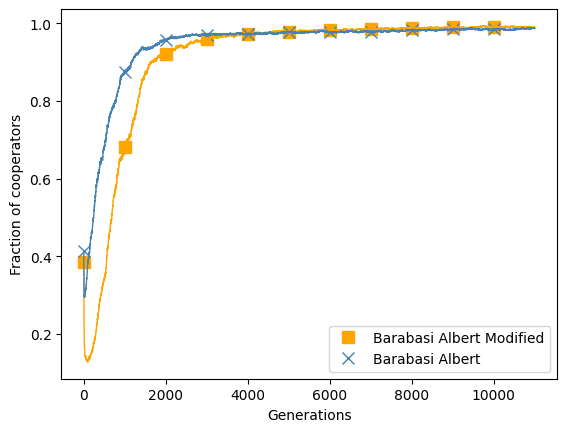

In [ ]:
#len(evolution_cooperators)
#num_simulations*(number_of_generations+supervised_generations)

min=0
max=11000
step=1000
x2=np.arange(min,max,step)
x=np.arange(min,max)

evo=np.reshape(evolution_cooperators,(2*num_simulations,number_of_generations+supervised_generations))
evo_rand=np.delete(evo, np.s_[1::2], 0)
evo_rand2=evo_rand[:,min:max:step]#np.delete(evo_rand, np.arange(0,11000,1000), axis=1)
#labels_rand=legend_str[0:2:-1]
evo__mod=np.delete(evo, np.s_[::2], 0)
evo__mod2=evo__mod[:,min:max:step]#np.delete(evo__mod, np.s_[::500], 1)
#labels__mod=legend_str[1:2:-1]


fig, ax=plt.subplots()

ax.plot(x2,np.transpose(np.mean(evo__mod2,axis=0)), color='orange', marker='s', linestyle='solid', linewidth=0, markersize=8, label = 'Barabasi Albert Modified')
ax.plot(x2,np.transpose(np.mean(evo_rand2,axis=0)), color='steelblue', marker='x', linestyle='solid', linewidth=0, markersize=8, label = 'Barabasi Albert')

ax.plot(x,np.transpose(np.mean(evo__mod,axis=0)), color='orange', marker=None, linestyle='solid', linewidth=1)
ax.plot(x,np.transpose(np.mean(evo_rand,axis=0)), color='steelblue', marker=None, linestyle='solid', linewidth=1)

ax.legend(loc = 'best')

#plt.title('Fraction of cooperators of SFN with different starting conditions for different values of "b"\n')
ax.set_xlabel("Generations")
ax.set_ylabel("Fraction of cooperators")

#ax.plot(np.transpose(np.mean(evo_rand,axis=0)))
#ax.plot(np.transpose(np.mean(evo__mod,axis=0)))
#ax.legend(['BA','BA Modified'])
#ax.set_xlabel('Generations')
#ax.set_ylabel('Graction of cooperators')

  
fig.show()

pic_filepath=images_dir+'Evolution_10sims_b180.svg'
fig.savefig(pic_filepath,format='svg')